First we need to get the data. We can use the Kaggle CLI (https://github.com/Kaggle/kaggle-api).

In [1]:
run(`pip install kaggle --quiet`)
run(`kaggle competitions download titanic --quiet`)
run(`unzip -qo titanic.zip`)

Process(`unzip -qo titanic.zip`, ProcessExited(0))

In [2]:
VERSION

v"1.4.1"

In [4]:
import Pkg

In [13]:
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("DataFramesMeta")
Pkg.add("Missings")
Pkg.add("FreqTables");
Pkg.add("GLM");
Pkg.add("Pipe");
Pkg.add("Plots");
Pkg.add("StatsBase")
Pkg.add("StatsPlots")
Pkg.add("XGBoost");
Pkg.add("Zygote");

  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environme

In [6]:
# TODO: add propper missing values (keep dict, make col for missing, apply on test)
# TODO: Ian Ozwald T-SNE on errors plot
# TODO: proper pipes, the _ syntax is ugly


In [14]:
using CSV, DataFrames, Pipe, Plots, Statistics, StatsBase, XGBoost, Zygote

Plots.default(legend=false, alpha=0.4, size=(300,200))
ENV["COLUMNS"]=220   # force dataframe HTML rendering to many columns; 220 is terminal characters

df = CSV.read("train.csv");

┌ Info: Precompiling XGBoost [009559a3-9522-5dbb-924b-0b6ed2b22bb9]
└ @ Base loading.jl:1260
┌ Info: Precompiling Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1260


In [15]:
first(df, 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String,Float64?,Int64,Int64,String,Float64,String?,String?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [16]:
first(df, 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String,Float64?,Int64,Int64,String,Float64,String?,String?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S


In [17]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,PassengerId,446.0,1,446.0,891,,,Int64
2,Survived,0.383838,0,0.0,1,,,Int64
3,Pclass,2.30864,1,3.0,3,,,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",891,,String
5,Sex,,female,,male,2,,String
6,Age,29.6991,0.42,28.0,80.0,,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,,,Int64
8,Parch,0.381594,0,0.0,6,,,Int64
9,Ticket,,110152,,WE/P 5735,681,,String


In [18]:
names(df)

12-element Array{String,1}:
 "PassengerId"
 "Survived"
 "Pclass"
 "Name"
 "Sex"
 "Age"
 "SibSp"
 "Parch"
 "Ticket"
 "Fare"
 "Cabin"
 "Embarked"

In [19]:
average_age = mean(skipmissing(df.Age))
df.Age = coalesce.(df.Age, average_age);   # coalesce replaces missing values

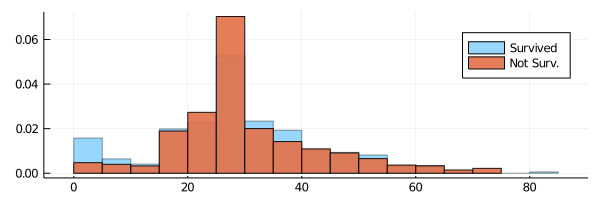

In [20]:
histogram(df[df.Survived.==1, :Age], normed=true, size=(600,200), legend=true, label="Survived")
histogram!(df[df.Survived.==0, :Age], alpha=0.9, normed=true, label="Not Surv.")

In [21]:
df.Embarked = coalesce.(df.Embarked, "S");

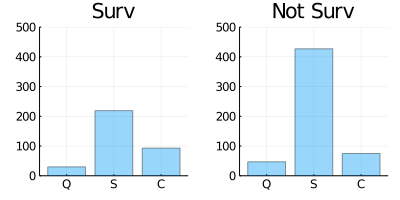

In [22]:
s = bar(countmap(df[df.Survived.==1, :Embarked]),)
ns = bar(countmap(df[df.Survived.==0, :Embarked]))
plot(s, ns, layout=2,  size=(400,200), title=["Surv" "Not Surv"], ylim=(0,500))

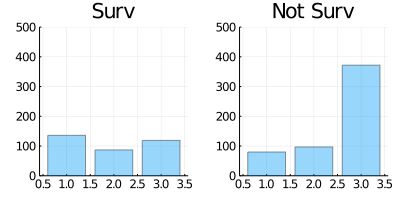

In [23]:
s = bar(countmap(df[df.Survived.==1, :Pclass]),)
ns = bar(countmap(df[df.Survived.==0, :Pclass]))
plot(s, ns, layout=2,  size=(400,200), title=["Surv" "Not Surv"], ylim=(0,500))

In [24]:
@pipe df |>
    groupby(_, :Survived) |>
    combine(_, :Fare => mean)

,Survived,Fare_mean
,Int64,Float64
1,0,22.1179
2,1,48.3954


In [25]:
first(df, 2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String,Float64,Int64,Int64,String,Float64,String?,String
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


In [26]:
# OHE the Pclass
for i in unique(df.Pclass)
    df[:,Symbol("Pclass_"*string(i))] = Int.(df.Pclass .== i)
end

In [27]:
# OHE the embarked
for i in unique(df.Embarked)
    df[:,Symbol("Embarked_"*string(i))] = Int.(df.Embarked .== i)
end

In [28]:
first(df, 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_3,Pclass_1,Pclass_2,Embarked_S,Embarked_C,Embarked_Q
,Int64,Int64,Int64,String,String,Float64,Int64,Int64,String,Float64,String?,String,Int64,Int64,Int64,Int64,Int64,Int64
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S,1,0,0,1,0,0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S,1,0,0,1,0,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,0,1,0,1,0,0
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S,1,0,0,1,0,0


In [29]:
gender_dict = Dict("male"=>1, "female"=>0);
df.Sex = map(akey->gender_dict[akey], df.Sex);


In [30]:
cols = Not([
    :Survived,
    :Name,
    :PassengerId,
    :Pclass,
    :Ticket,
    :Cabin,
    :Embarked
])

InvertedIndex{Array{Symbol,1}}([:Survived, :Name, :PassengerId, :Pclass, :Ticket, :Cabin, :Embarked])

In [31]:
x_train = convert(Matrix{Float32}, select(df[1:800,:], cols));
y_train = convert(Array{Float32}, df[1:800,:Survived]);
x_val = convert(Matrix{Float32},select(df[801:end,:], cols));
y_val = convert(Array{Float32}, df[801:end,:Survived]);

In [32]:
train_dmat = DMatrix(x_train, label=y_train)

DMatrix(Ptr{Nothing} @0x00000000073cfad0, XGBoost.var"#_setinfo#8"())

In [33]:
bst_base = xgboost(
    train_dmat,
    3,
    eta=0.3,
    objective="binary:logistic",
    eval_metric="auc"
)

[1]	train-auc:0.893250
[2]	train-auc:0.899080
[3]	train-auc:0.902066


Booster(Ptr{Nothing} @0x000000000935b510)

In [37]:
show(bst_base)

Booster(Ptr{Nothing} @0x000000000935b510)

In [40]:
imp = importance(bst_base)

9-element Vector{XGBoost.FeatureImportance}:
Gain      Coverage  Frequency  Feature
0.5567    0.1972    0.0423     f0
0.1343    0.0698    0.0423     f5
0.1155    0.1947    0.3380     f4
0.0967    0.2915    0.3239     f1
0.0443    0.1245    0.0423     f6
0.0390    0.0138    0.0845     f2
0.0075    0.0158    0.0423     f8
0.0054    0.0913    0.0704     f9
0.0006    0.0014    0.0141     f10


In [124]:
function plot_importances(booster, name_map=missing)
    imp = importance(booster)
    
    fnames = Vector{String}(undef, length(imp))
    gains = Vector{Float64}(undef, length(imp))
    coverages = Vector{Float64}(undef, length(imp))
    freqs = Vector{Float64}(undef, length(imp))
    
    for i in 1:length(imp)
        fnames[i] = imp[i].fname
        gains[i] = imp[i].gain
        coverages[i] = imp[i].cover
        freqs[i] = imp[i].freq
    end
    
    vars = [gains, coverages, freqs]
    names = ["Gain", "Coverage", "Frequency"]
    plots = [bar(reverse(fnames),
        reverse(vars[i]),
        orientation = :horizontal,
        title=names[i]) for i in 1:length(vars)]
    
    plot(plots..., layout=(1, 3), size=(600, 200))
    
end

plot_importances (generic function with 3 methods)

In [125]:
min(10,2)

2

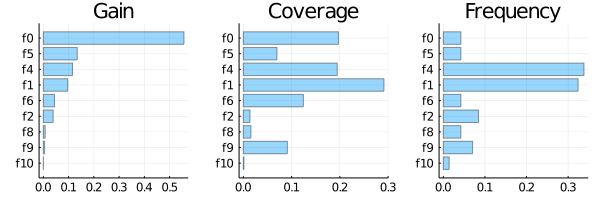

In [128]:
# TODO: put in the actual column names
# TODO: permutation importance
plot_importances(bst_base)

In [129]:
ŷ = XGBoost.predict(bst_base, x_val);

In [130]:
σ(x) = 1/(1+exp(-x))

σ (generic function with 1 method)

In [131]:
weighted_logistic_loss(x, y) = -1.5 .* y*log(σ(x)) - 1 .* (1-y)*log(1-σ(x))

weighted_logistic_loss (generic function with 1 method)

In [132]:
gradient_logistic(x, y) = gradient(weighted_logistic_loss,x,y)[1]

gradient_logistic (generic function with 1 method)

In [133]:
hess_logistic(x, y) = gradient(gradient_logistic,x,y)[1]

hess_logistic (generic function with 1 method)

In [134]:
function custom_objective(preds::Vector{Float32}, dtrain::DMatrix)
  y = get_info(dtrain, "label")
  grad = gradient_logistic.(preds, y)
  hess = hess_logistic.(preds, y)
  return grad, hess
end

custom_objective (generic function with 1 method)

In [135]:
bst = xgboost(train_dmat, 3, eta=0.3, eval_metric="auc", obj=custom_objective)

[1]	train-auc:0.892897
[2]	train-auc:0.899565
[3]	train-auc:0.912532


Booster(Ptr{Nothing} @0x000000000ca6e410)

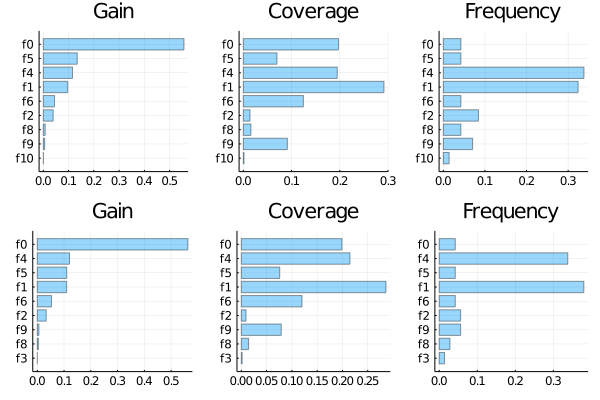

In [139]:
p = [plot_importances(bst_base), plot_importances(bst)]
plot(p..., layout=(2,1), size=(600, 400))

In [350]:
function evaluate(y, ŷ; threshold=0.5)
    out = zeros(Int64, 2, 2)
    ŷ = Int.(ŷ.>=threshold)
    out[1,1]=sum((y.==0).&(ŷ.==0))
    out[2,2]=sum((y.==1).&(ŷ.==1))
    out[2,1]=sum((y.==1).&(ŷ.==0))
    out[1,2]=sum((y.==0).&(ŷ.==1))
    r0 = out[1,1]/(out[1,1]+out[1,2])
    p0 = out[1,1]/(out[1,1]+out[2,1])
    f0 = 2*p0*r0/(p0+r0)
    r1 = out[2,2]/(out[2,2]+out[2,1])
    p1 = out[2,2]/(out[2,2]+out[1,2])
    f1 = 2*r1*p1/(p1+r1)
    println("Weighted f1 = ", round((sum(y .== 0.0)/length(y)) * f0 + (sum(y .== 1.0)/length(y)) * f1, digits=3))
    println("Accuracy =", (out[2,2]+out[1,1])/sum(out))
    out
end                    

evaluate (generic function with 1 method)

In [353]:
cm = evaluate(y_val, ŷ)

Weighted f1 = 0.845
Accuracy =0.8461538461538461


2×2 Array{Int64,2}:
 51   6
  8  26

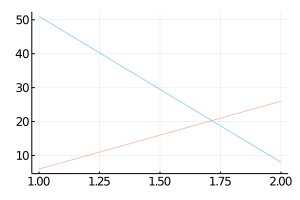

In [354]:
plot(cm)

In [93]:
sort(unique(df.Embarked))

3-element Array{String,1}:
 "C"
 "Q"
 "S"

In [83]:
DataFrame(transpose(indicatormat(df.Embarked)))

,x1,x2,x3
,Bool,Bool,Bool
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,0,1
8,0,0,1
9,0,0,1


In [84]:
zz = [1;2;3;2;1]; zz .== sort(unique(zz))'

5×3 BitArray{2}:
 1  0  0
 0  1  0
 0  0  1
 0  1  0
 1  0  0

In [85]:
zz = [1;2;3;2;1];

In [86]:
zz

5-element Array{Int64,1}:
 1
 2
 3
 2
 1

In [89]:
sort(unique(zz))'

1×3 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 1  2  3